# ∂Lux
## An overview 

---

This tutorial will give an overview of the various base classes that make up ∂Lux, and how to use them!

There a N different basic classes that provide users the strucutre needed to model most optical and astronomical observations in a way that is end-to-end differentiable. Most of the core classes have been deigned to be able to operate independently in order to allow for flexbility.

### Jax & Equinox

 - Immutibility
 - Pytrees
 - Autodiff
 - Garbage-in, Garbage-out (no input-checking to methods, only constructors)


## Base

The base class is an abstract class that all other classes in ∂Lux inherit from. This class has been created to simplify interfacing with the various tools that ∂Lux is built upon, namely `Jax` and `Equinox`. For a full tutorial on this functionality, please check out [this notebook](https://louisdesdoigts.github.io/dLux/notebooks/PyTree_interface/)

---

> ## Spectrum
>
> The spectrum class allows for parametrisations of various astronomical (or other!) sources. Currently there are three concrete spectrum classess:
> - ArraySpeectrum
> This class allows for an array-based spectrum, ie each wavelength corresponds to an individual weighting


## Sources

---

## Scenes

---

## Optics
### Optical Layers
### Wavefronts
### Propagators

---

## Filter

---

## Detector
### Detector Layers

---

## Instrument

---

In [56]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import equinox as eqx
import dLux as dl

In [57]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 120

---

# Spectrums

### Array and Polynomial

In [62]:
np.array(None)

DeviceArray(nan, dtype=float32)

In [ ]:
# Array spectrum testing
wavels = np.linspace(500e-9, 600e-9, 10) 
weights = np.linspace(1, 10, 10)
spec = dl.ArraySpectrum(wavels, weights)

assert np.allclose(wavels, spec.get_wavelengths())
assert np.allclose(weights, spec.get_weights())
assert np.allclose(np.sum(spec.get_weights()), 1.)

new_weights = np.linspace(20, 30, )
spec = dl.ArraySpectrum(wavels, weights)


assert np.allclose(wavels, spec.get_wavelengths())
assert np.allclose(wavels, spec.get_wavelengths())

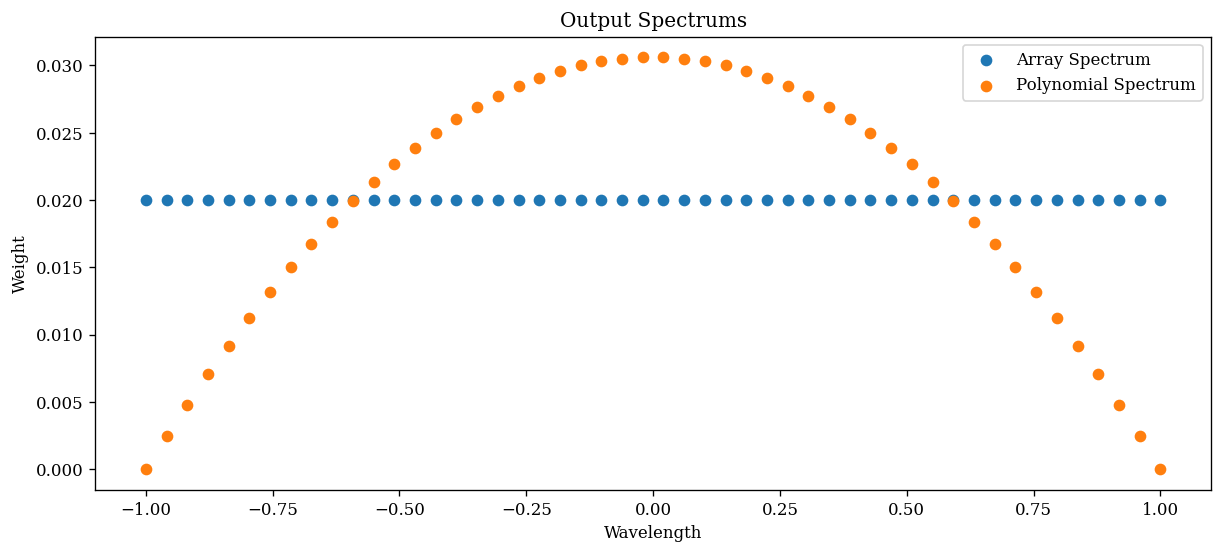

In [58]:
wavels = np.linspace(-1, 1, 10) 
# Yes wavelengths cant be negative but it is easier
# to show the polynomail acting correctly like this
coeffs = np.array([0.05, 0, -0.05])

arrspec  = dl.ArraySpectrum(wavels, np.ones(nwavels)).normalise()


arrspec.get_wavelengths()
arrspec.get_weights()
arrspec.normalise()
arrspec.set_wavelengths()
arrspec.set_weights()





polyspec = dl.PolynomialSpectrum(wavels, coeffs)

# Basic testing
spec1 = arrspec.get_spectrum()
spec2 = polyspec.get_spectrum()

# Basic tests
assert np.allclose(arrspec.get_wavelengths(),  spec1[0])
assert np.allclose(arrspec.get_weights(),      spec1[1])

assert np.allclose(polyspec.get_wavelengths(), spec2[0])
assert np.allclose(polyspec.get_weights(),     spec2[1])

plt.figure(figsize=(12, 5))
plt.title("Output Spectrums")
plt.scatter(spec1[0], spec1[1], label="Array Spectrum")
plt.scatter(spec2[0], spec2[1], label="Polynomial Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [59]:
dir(arrspec)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_get_leaf',
 '_get_wavelengths',
 '_get_weights',
 '_has_dataclass_init',
 '_unwrap_paths',
 'apply_to_leaves',
 'get_filter_spec',
 'get_leaf',
 'get_leaves',
 'get_optimiser',
 'get_param_spec',
 'get_spectrum',
 'get_wavelengths',
 'get_weights',
 'normalise',
 'set_wavelengths',
 'set_weights',
 'tree_flatten',
 'tree_unflatten',
 'update_and_model',
 'update_leaves',
 'wavelengths',
 'weights']

## Combined

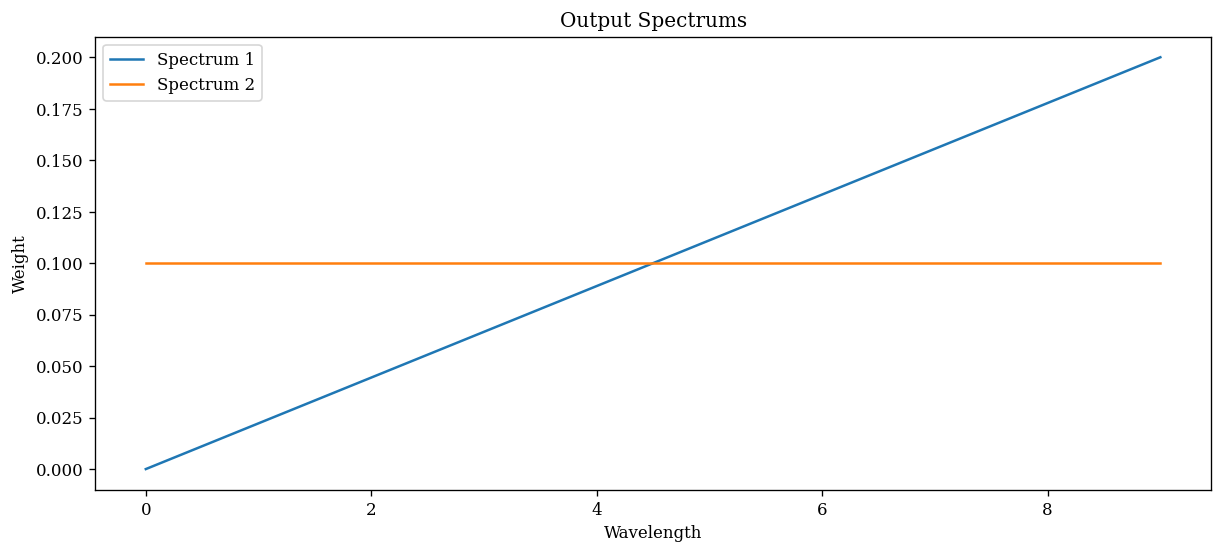

In [6]:
# from dLux.spectrums import CombinedSpectrum

spec = dl.CombinedSpectrum([np.arange(10), np.arange(10)], [np.arange(10), np.ones(10)])
spec = spec.normalise()
spec_out = spec.get_spectrum()

plt.figure(figsize=(12, 5))
plt.title("Output Spectrums")
for i in range(spec_out.shape[1]):
    plt.plot(spec_out[0, i], spec_out[1, i], label='Spectrum {}'.format(i+1))
plt.xlabel("Wavelength")
plt.ylabel("Weight")
plt.legend()
plt.show()

---

# Sources

### TODO: Normalise source distribution with source.normalise()

In [7]:
# import time as t
# kernel_sizes = np.round(np.geomspace(2, 512, 9)).astype(int)
# nevals = 1000
# base_arr = jr.uniform(jr.PRNGKey(0), (512, 512))

# times = []
# for k in tqdm(kernel_sizes):
    
#     temp = []
#     conv_arr = jr.normal(jr.PRNGKey(0), (k, k))
#     for i in tqdm(range(nevals), leave=False):
#         t0 = t.time()
#         _ = jsp.signal.convolve(base_arr, conv_arr, mode='same').block_until_ready()
#         temp.append(t.time() - t0)
#     times.append(temp)
# times = np.array(times)

In [8]:
# times = np.array(times)

In [9]:
# mean = np.mean(times, axis=1)
# var = np.var(times, axis=1)

In [10]:
# plt.scatter(kernel_sizes[:6], mean)
# plt.xlabel('kernel size')
# plt.ylabel('average time')
# plt.show()
# plt.scatter(kernel_sizes[:6], var)

In [11]:
class ParametricDistribution(dl.sources.ResolvedSource):
    """
    
    """
    pass

In [12]:
# class StarDustShell(PointExtendedSource):
# class StarDustShell(Parametric):
    # pass


## Point

In [13]:
# Point source Testing
nwavels = 25
wavelengths = np.linspace(4e-7, 6e-7, nwavels)
spectrum_in = dl.ArraySpectrum(wavelengths)

position = np.array([0, 0]) # On axis
flux = np.asarray(1e6)

point = dl.PointSource(position, flux, spectrum_in)

assert np.allclose(point.get_position(), position)
assert np.allclose(point.get_flux(), flux)
assert np.allclose(point.get_spectrum()[0], wavelengths)
assert np.allclose(point.get_spectrum()[1].sum(), 1)
# assert point.is_resolved() is False

## Binary

In [14]:
# Testing
nwavels = 10
wavels = np.linspace(4e-7, 5e-7, nwavels)
wavelengths = [wavels, wavels]
weights = [np.ones(nwavels), np.linspace(0.5, 1, nwavels)]
spectrum = dl.CombinedSpectrum(wavelengths, weights)

position = np.zeros(2)
separation = 1
field_angle = 0

flux = 3
flux_ratio = 2
resolved = np.array([False, False])

source = dl.BinarySource(position, flux, separation, field_angle, flux_ratio, spectrum, resolved)
# assert np.allclose(source.is_resolved(), resolved)

## Extended

In [15]:
# def make_gaussian(size, fwhm = 3, center=None):
def make_gaussian(size, fwhmx = 3, fwhmy = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * (((x-x0)/fwhmx)**2 + ((y-y0)/fwhmy)**2))# / fwhm**2)

In [16]:
# Extended source Testing
nwavels = 10
wavelengths = np.linspace(4e-7, 6e-7, nwavels)
spectrum_in = dl.ArraySpectrum(wavelengths)

position = np.array([0, 0]) # On axis
flux = np.asarray(1e6)

distribution = make_gaussian(30, fwhmx=10, fwhmy=5)
extended = dl.ArrayDistribution(position, flux, spectrum_in, distribution)

---

# Filter

### TODO:
Bandpass Integration

In [17]:
# from dLux.base import Filter
wavels = np.arange(15)
throughput = 2*np.ones(len(wavels))
filt = dl.Filter(wavels, throughput)
print(filt.get_throughput(np.array([1e4, 1e5])))

[2. 2.]


/Users/louis/mambaforge/envs/dlux/lib/python3.10/site-packages/dLux/base.py:1431: UserWarning: Filter throughputs should be between 0-1, 15                 throughputs are above 1 or below 0.
  warnings.warn("Filter throughputs should be between 0-1, {} \


---

# Instrument

### TODO: Allow each function to have optional inputs for each parameter
### Redoccument
### How to map all position to true for filter spec?
 - have an optional 'iterate' parameter that iterates on keys at that layer? base class
### have params_dict as an attribute of base class than can be updated
### have optional fliter spec return for update leaves, apply to leaves, etc
 
 convolving: Have source distiburtion existance 

In [18]:
from collections import OrderedDict
import jax.tree_util as jtu

In [19]:
# Point Source
point_source = dl.PointSource(np.array([0, 1e-5]), 1e4,\
               dl.ArraySpectrum(np.linspace(4e-7, 5e-7, 5)), name="Point")

# Binary Source
wavels = np.linspace(4e-7, 5e-7, 10)
weights = [np.ones(len(wavels)), np.linspace(0.5, 1, len(wavels))]
combined_spectrum = dl.CombinedSpectrum([wavels, wavels], weights)
binary_source = dl.BinarySource(np.zeros(2), 1e4, 1e-5, 0, 2, \
                             combined_spectrum, name="Binary")

# Extended source
distribution = make_gaussian(30, fwhmx=10, fwhmy=5)
extended_source = dl.ArrayDistribution(np.array([0, -1e-5]), 4e4, dl.ArraySpectrum(np.linspace(4e-7, 6e-7, 5)), distribution)
sources = [point_source, binary_source, extended_source]

In [20]:
import sys
sys.path.append("../")
from spiders import UniformSpider
spider = UniformSpider(1, 256, 0.5, [0., 0.], 4, 0.02, np.pi/4)._spider()

In [21]:
# plt.imshow(spider)
# plt.colorbar()

In [22]:
# Optical system
layers = [dl.CreateWavefront(256, 1),
          dl.TransmissiveOptic(spider),
          dl.TiltWavefront(),
          dl.CompoundAperture([0.5], occulter_radii=[0.1]),
          dl.NormaliseWavefront(),
          dl.AngularMFT(1e-7, 256)]

telescope = dl.Instrument(optical_layers=layers, sources=sources, detector_layers=[dl.AddConstant(10)])

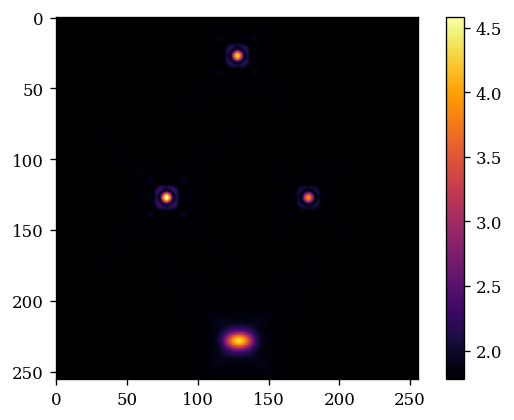

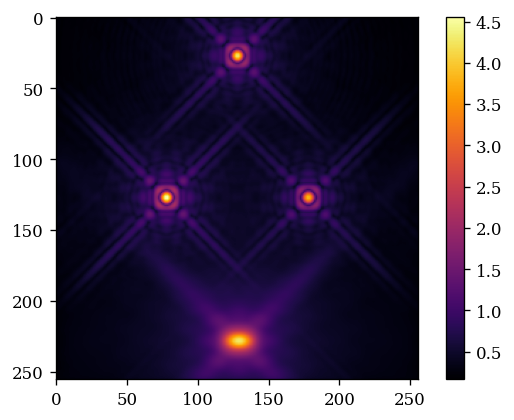

In [23]:
data = telescope.model()

plt.imshow(data**0.25)
# plt.imshow(np.log10(data))
plt.colorbar()
plt.show()

# This breaks things, oops
# data = telescope.optics.model_sources(telescope.scene.sources, filter_in=telescope.filter)
data = telescope.optics.model_sources(telescope.scene.sources)

plt.imshow(data**0.25)
# plt.imshow(np.log10(data))
plt.colorbar()
plt.show()

In [24]:
distribution.shape

(30, 30)

In [25]:
extended_source = dl.ArrayDistribution(np.array([0, -1e-5]), 4e4, dl.ArraySpectrum(np.linspace(4e-7, 6e-7, 5)), distribution)
im = telescope.model_source(extended_source)
# plt.imshow(im)

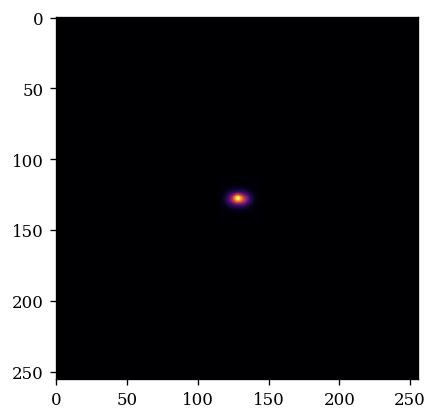

In [26]:
nwavels = 5
wavelengths = np.linspace(4e-7, 6e-7, nwavels)
spectrum = dl.ArraySpectrum(wavelengths)

position = np.array([0, 0]) # On axis
flux = np.asarray(1e6)

im = telescope.model_source(dl.ArrayDistribution(position, flux, spectrum, distribution, 10))
im = telescope.model_source(dl.PointExtendedSource(position, flux, spectrum, distribution**0.25, 1))
im = telescope.model_source(dl.PointAndExtendedSource(position, flux, combined_spectrum, distribution, 0.1))

plt.imshow(im)

In [27]:
import jax.random as jr

wavels = np.linspace(4e-7, 6e-7, 5)
contrast = 1
flux = 1e6
species = ['S0', 'Sa', 'Sb', 'Sc', 'SBa', 'SBb', 'SBc']
ims = []
galactic_sources = []

for i in range(len(species)):
    specie = species[i]

    distribution = np.load('galaxies/{}.npy'.format(specie))
    extended_source = dl.PointExtendedSource(np.array([0, 0]), flux, dl.ArraySpectrum(wavels), distribution, contrast)
    galactic_sources.append(extended_source)
    ims.append(telescope.model_source(extended_source))
    
distribution = np.load('galaxies/dust.npy'.format(species))
extended_source = dl.PointExtendedSource(np.array([0, 0]), flux, dl.ArraySpectrum(wavels), distribution, contrast)
ims.append(telescope.model_source(extended_source))

In [28]:
ims = [im + 10 + jr.normal(jr.PRNGKey(0), shape=(im.shape)) for im in ims]

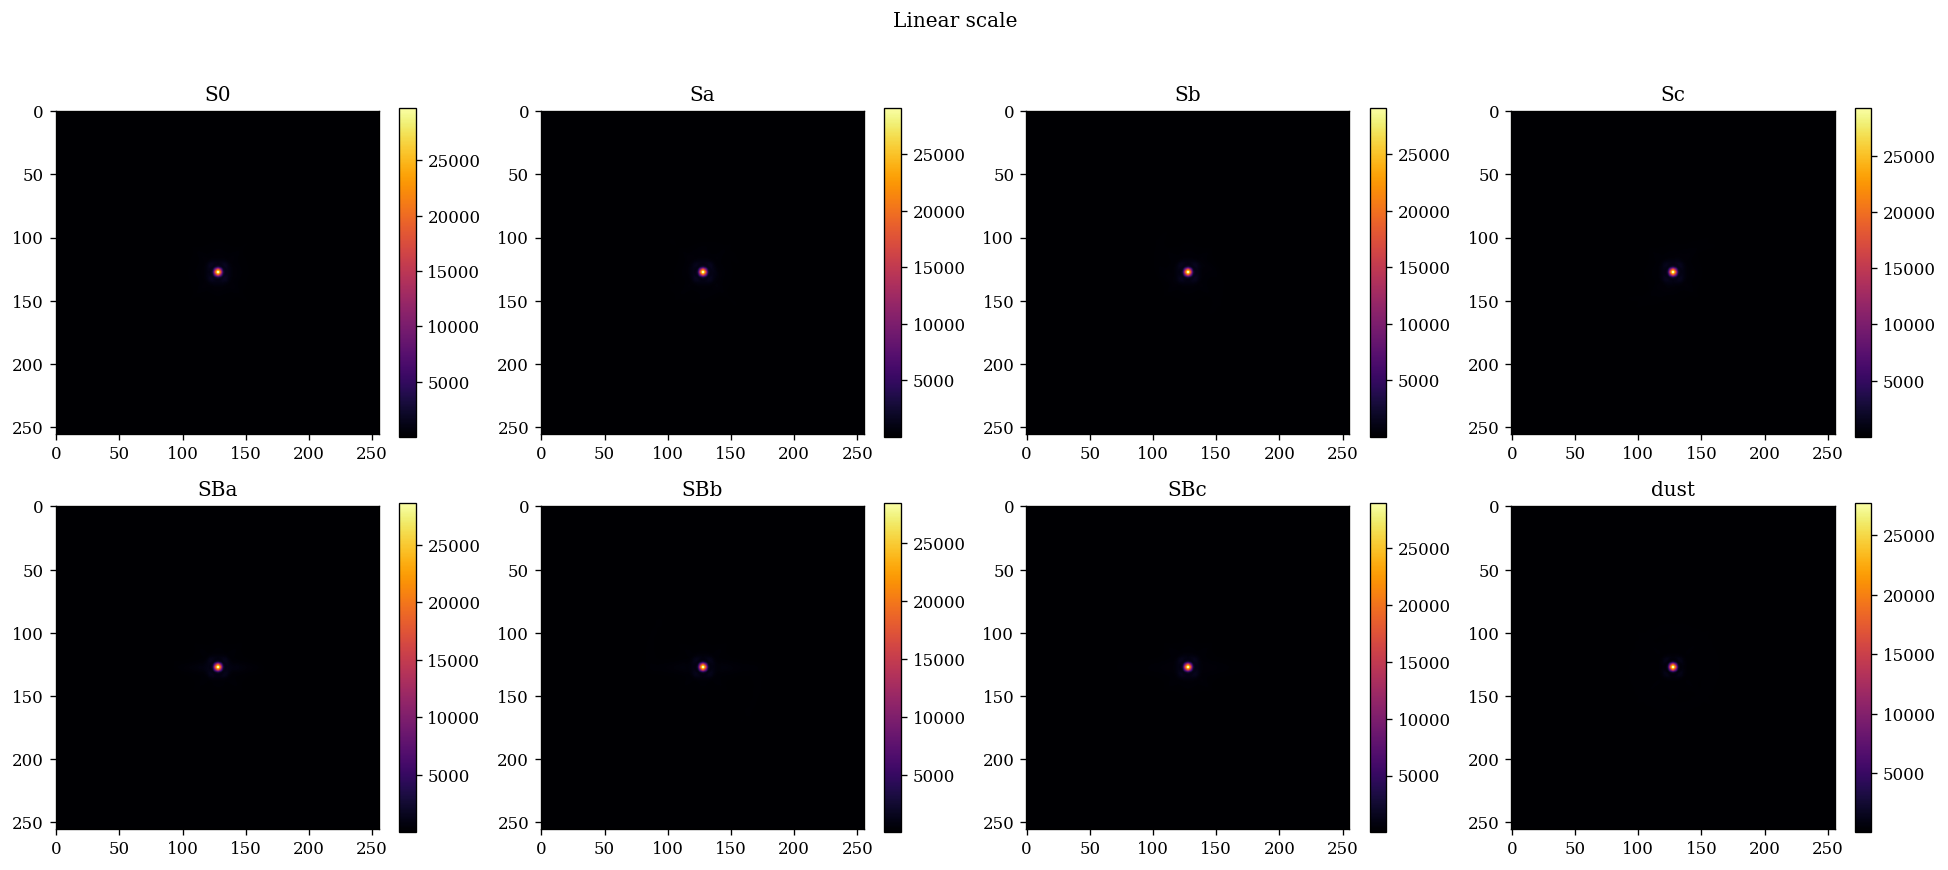

In [29]:
types = species + ['dust']

plt.figure(figsize=(20, 8))
plt.suptitle('Linear scale')
for i in range(len(ims)):
    plt.subplot(2, 4, i+1)
    plt.imshow(ims[i])
    plt.title(types[i])
    plt.colorbar()
plt.savefig('galaxies_linear')
plt.show()

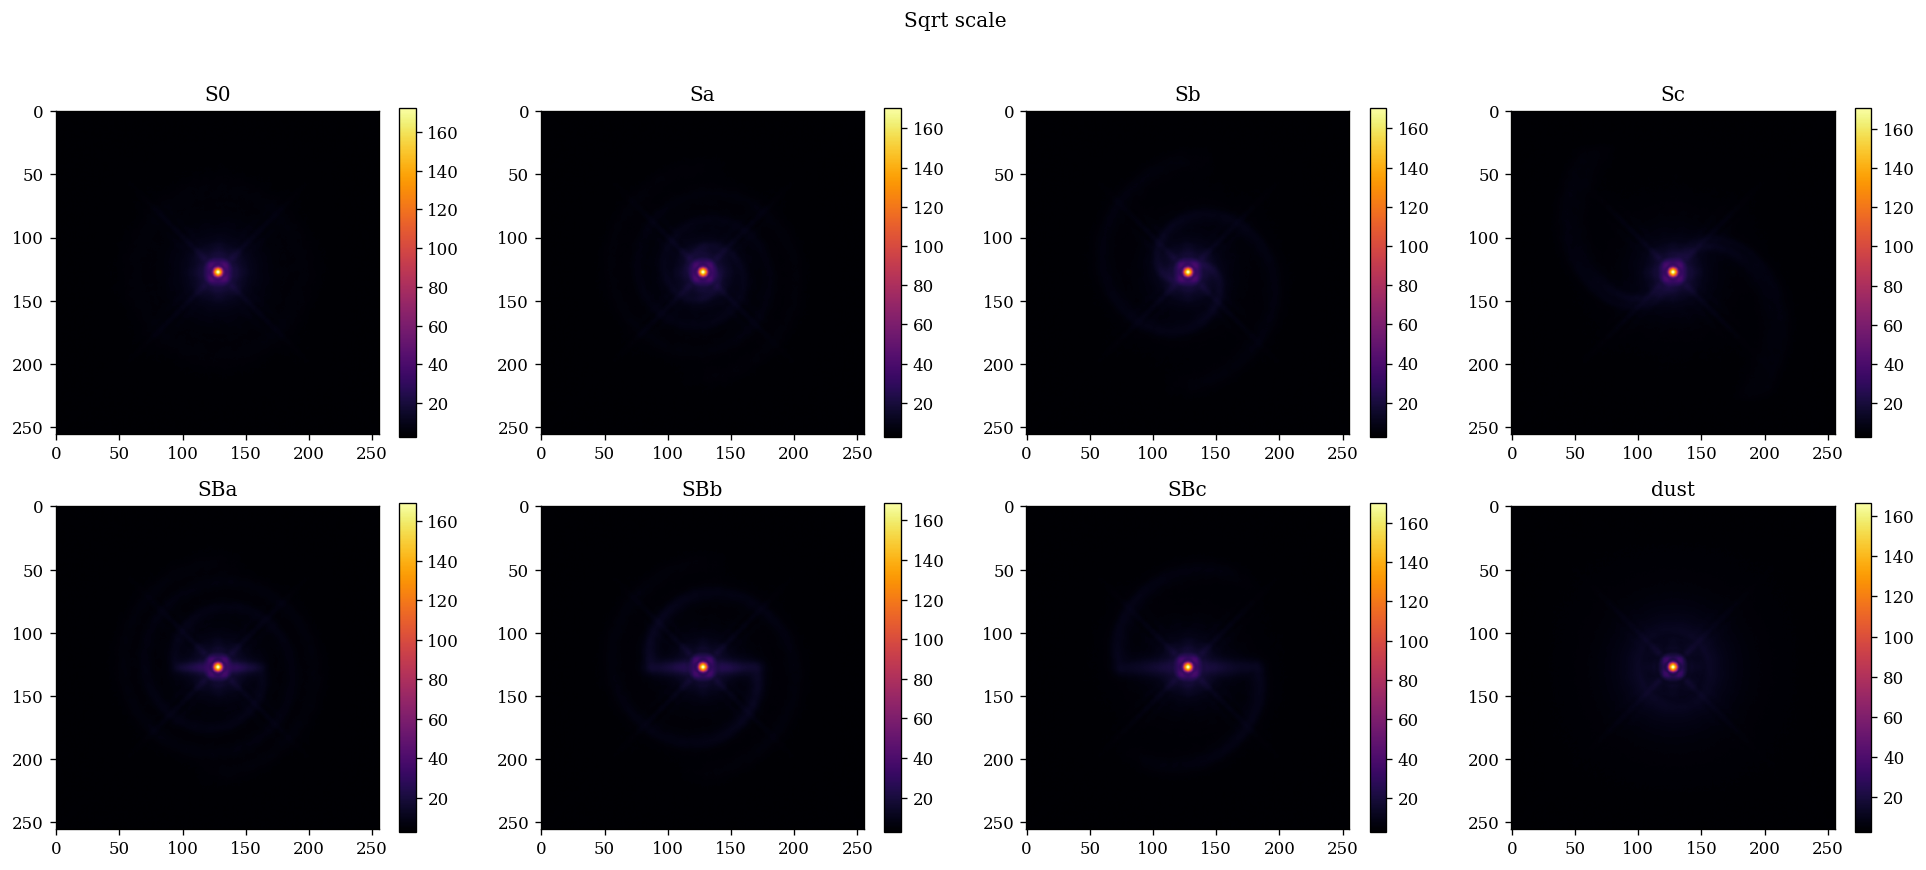

In [30]:
plt.figure(figsize=(20, 8))
plt.suptitle('Sqrt scale')
for i in range(len(ims)):
    plt.subplot(2, 4, i+1)
    plt.imshow(ims[i]**0.5)
    plt.title(types[i])
    plt.colorbar()
plt.savefig('galaxies_sqrt')
plt.show()

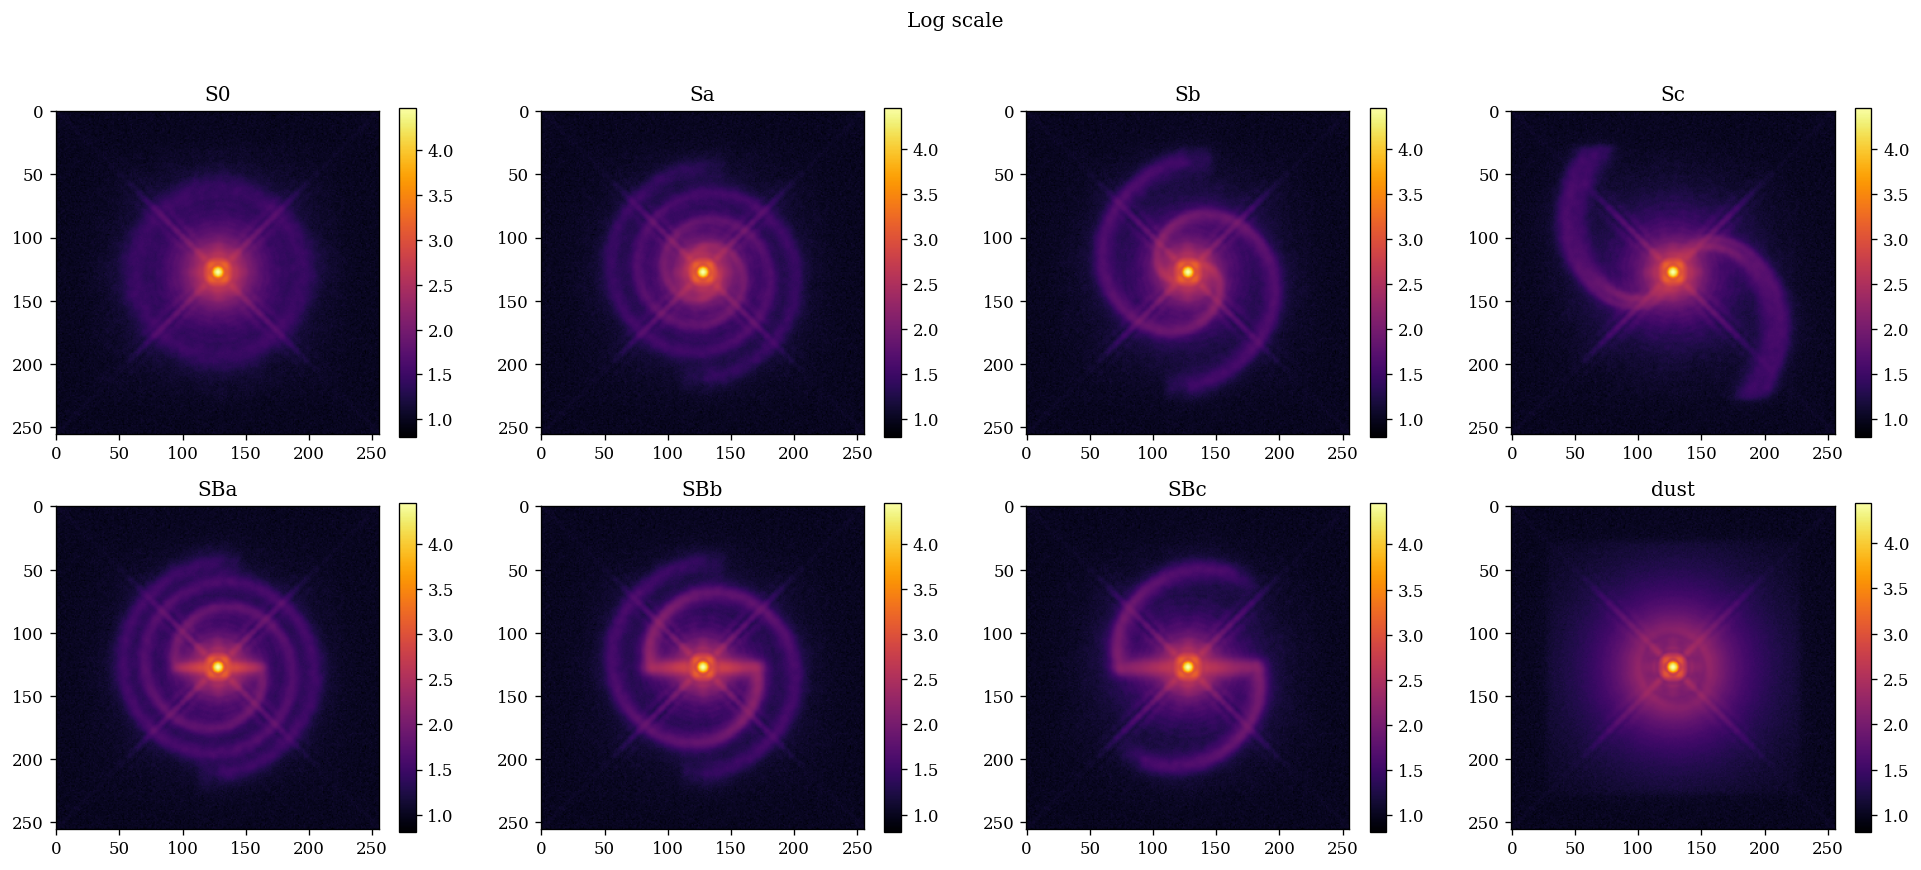

In [31]:
plt.figure(figsize=(20, 8))
plt.suptitle('Log scale')
for i in range(len(ims)):
    plt.subplot(2, 4, i+1)
    # plt.imshow(ims[i]**0.5)
    plt.imshow(np.log10(ims[i]))
    plt.title(types[i])
    plt.colorbar()
# plt.savefig('galaxies_sqrt')
plt.show()

---

# Gradient Tests

In [32]:
# galactic_sources[5]

In [33]:
telescope = telescope.update_leaves([['scene', 'sources']], [{"Source": galactic_sources[5]}])

In [34]:
%%timeit
_ = telescope.model().block_until_ready()

748 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
telescope = telescope.update_leaves([['scene', 'sources']], [{"Source": point_source}])

In [36]:
%%timeit
_ = telescope.model().block_until_ready()

147 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


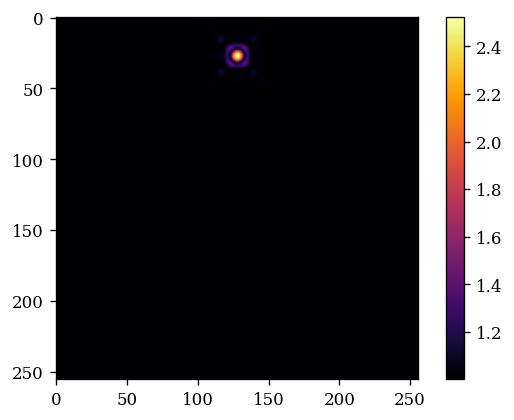

In [37]:
# Make galaxy source telescope
# telescope = Instrument(layers, sources=galactic_sources[5:6])
# telescope = telescope.update_leaves([['scene', 'sources']], [{"Source": galactic_sources[5]}])
telescope = telescope.update_leaves([['scene', 'sources']], [{"Source": point_source}])
im = telescope.model()

plt.imshow(np.log10(im))
plt.colorbar()

In [38]:
import optax
from tqdm.notebook import tqdm
import jax.random as jr

In [39]:
# path_dict = {'point':    ['sources', "Point", 'flux'],
#              'binary':   ['sources', "Binary", 'separation'],
#              'extended': ['sources', "Source", 'distribution']}

path_dict = {'pos':    ['scene', 'sources', 'Source', 'position'],
             'flux':   ['scene', 'sources', 'Source', 'flux'],
             'cont':   ['scene', 'sources', 'Source', 'flux_ratio'],
             'dist':   ['scene', 'sources', 'Source', 'distribution']}

In [40]:
telescope.optics.layers['AngularMFT'].pixel_scale_out

DeviceArray(1.e-07, dtype=float32)

In [41]:
telescope.scene.sources

{'Source': PointSource(
   position=f32[2],
   flux=f32[],
   spectrum=ArraySpectrum(wavelengths=f32[5], weights=f32[5]),
   name='Point'
 )}

In [42]:
# paths = ['point', 'binary', 'extended']
# paths = ['pos', 'flux', 'cont', 'dist']
# paths = ['pos', 'flux', 'cont']
paths = ['pos', 'flux']
# fns = [lambda x: np.array([1e-7, 1e-7]), 
#        lambda x: 0.9*x, 
#        lambda x: 1.1*x,
#        lambda x: np.ones((200, 200))/(200**2)]
# fns = [lambda x: np.array([1e-7, 1e-7]), 
#        lambda x: 0.9*x, 
#        lambda x: 1.1*x]
fns = [lambda x: np.array([1e-7, x[1]*1.01]), 
       lambda x: 0.9*x]

model = telescope.apply_to_leaves(paths, fns, path_dict=path_dict)

In [43]:
model.scene.sources['Source'].position

DeviceArray([1.00e-07, 1.01e-05], dtype=float32)

In [44]:
fs = model.get_filter_spec(paths, path_dict=path_dict)

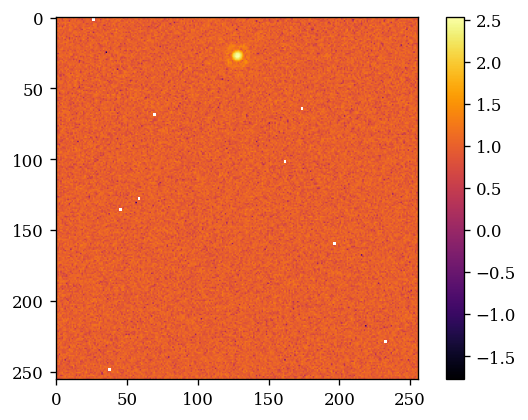

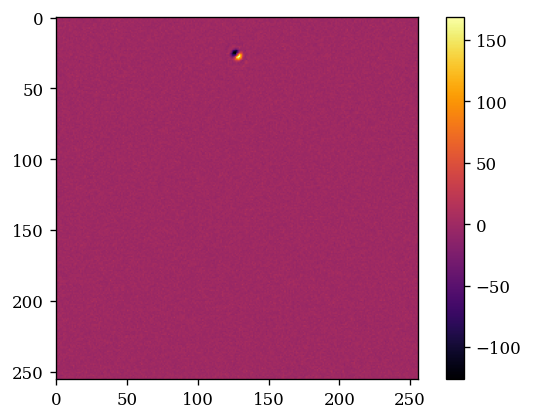

In [45]:
# data = jr.poisson(jr.PRNGKey(0), telescope.model_sources()) + jr.normal(jr.PRNGKey(0), shape=(256, 256))
data = jr.poisson(jr.PRNGKey(0), telescope.model()) + jr.normal(jr.PRNGKey(0), shape=(256, 256))

# plt.imshow(data)
plt.imshow(np.log10(data))
plt.colorbar()
plt.show()

psf_out = model.model()
# plt.imshow(np.log10(np.abs(data - psf_out)))
plt.imshow(data - psf_out)
plt.colorbar()

In [46]:
@eqx.filter_jit
@eqx.filter_value_and_grad(arg=fs)
def loss_fn(telescope, data):
    psf = telescope.model()
    return np.sum(np.square(psf - data))

In [47]:
loss, grads = loss_fn(model, data)
print(loss)

for i in range(len(paths)-1):
    print("{}: {}".format(paths[i], grads.get_leaf(paths[i], path_dict=path_dict)))
    
# plt.imshow(grads.get_leaves(paths[-1:], path_dict=path_dict)[0])
# plt.title(paths[-1])
# plt.colorbar()
# plt.show()

1088579.5
pos: [3.2923347e+12 3.1589608e+12]


In [48]:
optimisers = [optax.adam(1e-8), 
              
              optax.adam(optax.piecewise_constant_schedule(
                          init_value=1e-8 * 1e4, 
                          boundaries_and_scales={25 : int(1e8)})),
              
              optax.adam(optax.piecewise_constant_schedule(
                          init_value=1e-8 * 2e-2, 
                          boundaries_and_scales={50 : int(1e8)})),
             ]
              
             #  optax.adam(optax.piecewise_constant_schedule(
             #              init_value=1e-8 * 1e-5, 
             #              boundaries_and_scales={50 : int(1e8)}))
             # ]

optim = model.get_optimiser(paths, optimisers, path_dict=path_dict)
model = telescope.apply_to_leaves(paths, fns, path_dict=path_dict)
opt_state = optim.init(model)

In [49]:
errors, grads_out, models_out = [], [], []
with tqdm(range(150),desc='Gradient Descent') as t:
    for i in t: 
        # calculate the loss and gradient
        loss, grads = loss_fn(model, data) 
        
        # apply the update
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        model = model.normalise()
        
        
        # save results
        models_out.append(model) 
        errors.append(loss)
        grads_out.append(grads)
        
        # t.set_description('Loss %.5f' % (loss)) # update the progress bar
        t.set_description('Loss {:.5}'.format(loss)) # update the progress bar

Gradient Descent:   0%|          | 0/150 [00:00<?, ?it/s]

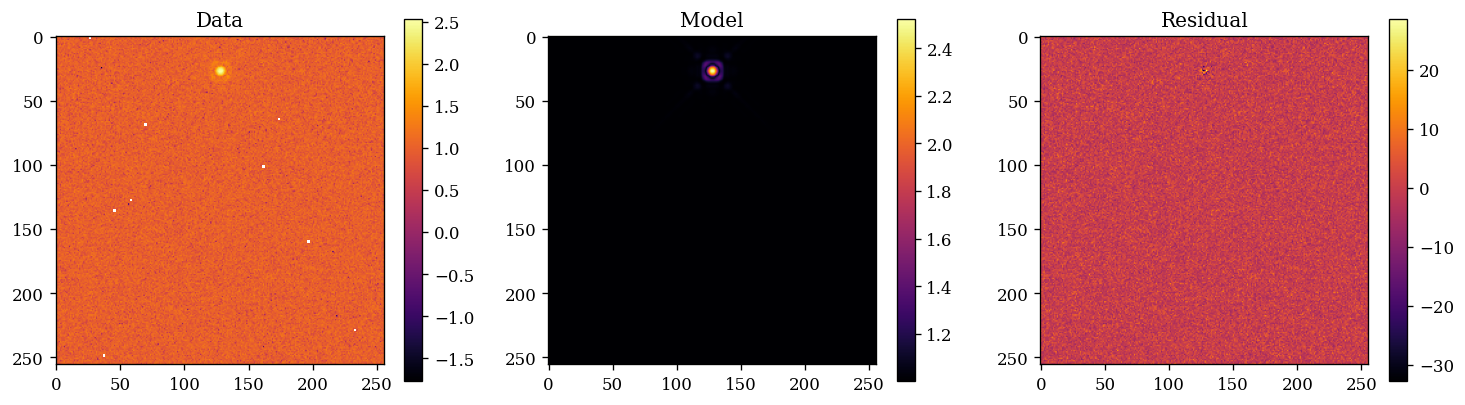

In [50]:
psf_out = models_out[-1].model()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Data")
plt.imshow(np.log10(data))
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(np.log10(psf_out))
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data - psf_out)
plt.colorbar()
plt.show()

In [51]:
errors = np.array(errors)

# models_out = [m.update_leaves(['sources', 'Source'], [m.get_leaf(['sources', 'Source']).normalise()]) for m in models_out]

poses     = telescope.get_leaf(['pos'],  path_dict=path_dict) - np.array([m.get_leaf('pos',  path_dict=path_dict) for m in models_out])
fluxes    = telescope.get_leaf(['flux'], path_dict=path_dict) - np.array([m.get_leaf('flux', path_dict=path_dict) for m in models_out])
# contrasts = telescope.get_leaf(['cont'], path_dict=path_dict) - np.array([m.get_leaf('cont', path_dict=path_dict) for m in models_out])
# distribu  = telescope.get_leaf(['dist'], path_dict=path_dict) - np.array([m.get_leaf('dist', path_dict=path_dict) for m in models_out])
# mean_distribu = np.square(distribu).sum((-1,-2))
# final_distirbution = models_out[-1].get_leaf('dist', path_dict=path_dict)

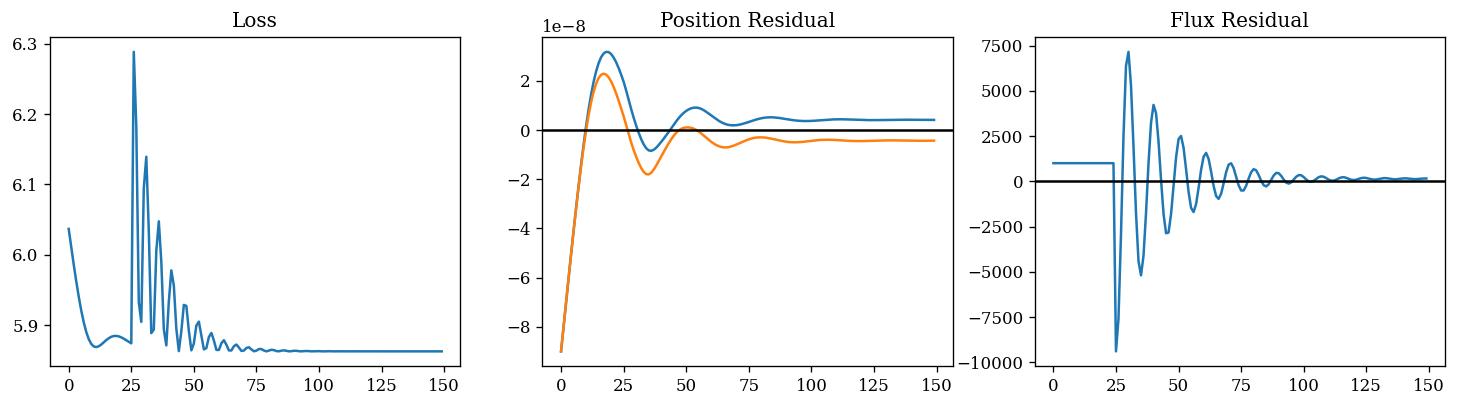

In [52]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title('Loss')
# plt.plot(errors)
plt.plot(np.log10(errors))

plt.subplot(2, 3, 2)
plt.title("Position Residual")
plt.plot(poses)
plt.axhline(0, c='k')

plt.subplot(2, 3, 3)
plt.title("Flux Residual")
plt.plot(fluxes)
plt.axhline(0, c='k')

# plt.subplot(2, 3, 4)
# plt.title("Contrast Residual")
# plt.plot(contrasts)
# plt.axhline(0, c='k')

# plt.subplot(2, 3, 5)
# # plt.title("Final Distribution Residual")
# # plt.imshow(distribu[-1])
# # plt.colorbar()
# plt.title("Final Distribution Residual")
# plt.plot(mean_distribu)
# plt.axhline(0, c='k')

# plt.subplot(2, 3, 6)
# plt.title("Final Distribution")
# plt.imshow(final_distirbution)
# plt.colorbar()
plt.show()

In [53]:
errors = np.array(errors)

seps = np.array([m.get_leaf('binary', path_dict=path_dict) for m in models_out])
fluxes = np.array([m.get_leaf('point', path_dict=path_dict) for m in models_out])

true_dist = telescope.get_leaf('extended', path_dict=path_dict)
dists = np.array([m.get_leaf('extended', path_dict=path_dict) for m in models_out])
dist_err = np.array([np.sum((dist - true_dist)**2) for dist in dists])

KeyError: 'binary'

In [ ]:
plt.plot(errors)
plt.show()

plt.plot(np.log10(errors))
plt.show()

plt.plot(fluxes)
plt.show()

plt.plot(seps)
plt.show()

plt.plot(dist_err)
plt.show()

plt.imshow(dists[-1] - true_dist)
plt.colorbar()
plt.show()